In [2]:

import re
import os
import sys
import pickle
from collections import Counter

import numpy as np
import pandas as pd
import networkx as nx
import pybedtools as bt
from scipy import stats

import matplotlib.patches as mpatches
import matplotlib.collections as mcol

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

from matplotlib import gridspec
from matplotlib.lines import Line2D
from mycolorpy import colorlist as mcp

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind

color1=mcp.gen_color(cmap="Reds",n=10)[-7:-2]
color2=mcp.gen_color(cmap="Greys",n=10)[-5:]

sns.set(style="ticks", font_scale=2)

BEDPRO = pickle.load(open('data/BEDPRO.p', 'rb'))

#BEDPES_H3K27ac = {}
#for i, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
#    BEDPES_H3K27ac[h] = bt.BedTool(f"data/ALL_H3K27ac_{h}.tmm.bedpe")
#
#BEDPES_H3K4me3 = {}
#for i, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
#    BEDPES_H3K4me3[h] = bt.BedTool(f"data/ALL_H3K4me3_{h}.tmm.bedpe")

# Enhancer View

In [3]:
H = pickle.load( open('data/G_ALL.p', 'rb'))
MAPty = pickle.load(open('data/MAPty.p', 'rb'))
MAPcl = pickle.load(open('data/MAPcl.p', 'rb'))

In [4]:
Counter(MAPcl.values())

Counter({'cre': 59570,
         'ARcre': 5231,
         'Mid-low': 3346,
         'low': 3353,
         'Mid-high': 3340,
         'High': 3316,
         'ANDR': 89})

In [5]:

np.random.seed(7)
andr = [n for n, nc in MAPcl.items() if nc == 'ANDR']
high = np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr))
midh = np.random.choice([n for n, nc in MAPcl.items() if nc == 'Mid-high'], size=len(andr))
len(high), len(midh), len(andr)

(89, 89, 89)

In [6]:

s = 'H3K27ac'

geneset = list([n for n, nc in MAPcl.items() if nc == 'ANDR'])
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'ARcre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c1 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'ANDR'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'cre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c2 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'cre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


BOOT = 1000
FC1_H3K27ac = np.zeros((BOOT, 5))
t1_H3K27ac = np.zeros((BOOT, 5))
FC2_H3K27ac = np.zeros((BOOT, 5))
t2_H3K27ac = np.zeros((BOOT, 5))
FC3_H3K27ac = np.zeros((BOOT, 5))
t3_H3K27ac = np.zeros((BOOT, 5))
#for j, s in enumerate(['H3K27ac', 'H3K4me3']):
####################################
np.random.seed(7)
for i in range(BOOT):
    geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
    I = {
        n:list(nx.bfs_layers(H, n))[1]
        for n in geneset
        if n in H
        if len(list(nx.bfs_layers(H, n))) > 1
    }
    pal = ['#5F9BD3', '#FBB550']

    A = []
    for p,es in I.items():
        for e in es:
            if MAPcl[e] == 'cre':
                d = H.get_edge_data(p, e)
                l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

                A += [l]

    tmp = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

    FC1_H3K27ac[i,:] = c1.mean(0) / tmp.mean(0) 
    t_, p_ = ttest_ind(c1, tmp)
    t1_H3K27ac[i,:] = t_
    FC2_H3K27ac[i,:] = c2.mean(0) / tmp.mean(0)
    t_, p_ = ttest_ind(c2, tmp)
    t2_H3K27ac[i,:] = t_
    FC3_H3K27ac[i,:] = c3.mean(0) / tmp.mean(0)
    t_, p_ = ttest_ind(c3, tmp)
    t3_H3K27ac[i,:] = t_        
            
            
   

In [42]:
np.quantile(t1_H3K27ac[:,0], 0.95), np.quantile(t2_H3K27ac[:,0], 0.95), np.quantile(t3_H3K27ac[:,0], 0.95)



np.quantile(t1_H3K27ac[:,1], 0.95), np.quantile(t2_H3K27ac[:,1], 0.95), np.quantile(t3_H3K27ac[:,1], 0.95)

np.quantile(t1_H3K27ac[:,2], 0.95), np.quantile(t2_H3K27ac[:,2], 0.95), np.quantile(t3_H3K27ac[:,2], 0.95)

np.quantile(t1_H3K27ac[:,3], 0.95), np.quantile(t2_H3K27ac[:,3], 0.95), np.quantile(t3_H3K27ac[:,3], 0.95)

np.quantile(t1_H3K27ac[:,4], 0.95), np.quantile(t2_H3K27ac[:,4], 0.95), np.quantile(t3_H3K27ac[:,4], 0.95)

(7.782277475450186, 0.6236059764807151, 2.1524037335371897)

In [14]:

s = 'H3K4me3'

geneset = list([n for n, nc in MAPcl.items() if nc == 'ANDR'])
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'ARcre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c1 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'ANDR'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'cre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c2 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'cre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


BOOT = 1000
FC1_H3K4me3 = np.zeros((BOOT, 5))
t1_H3K4me3 = np.zeros((BOOT, 5))
FC2_H3K4me3 = np.zeros((BOOT, 5))
t2_H3K4me3 = np.zeros((BOOT, 5))
FC3_H3K4me3 = np.zeros((BOOT, 5))
t3_H3K4me3 = np.zeros((BOOT, 5))
#for j, s in enumerate(['H3K27ac', 'H3K4me3']):
####################################
np.random.seed(7)
for i in range(BOOT):
    geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
    I = {
        n:list(nx.bfs_layers(H, n))[1]
        for n in geneset
        if n in H
        if len(list(nx.bfs_layers(H, n))) > 1
    }
    pal = ['#5F9BD3', '#FBB550']

    A = []
    for p,es in I.items():
        for e in es:
            if MAPcl[e] == 'cre':
                d = H.get_edge_data(p, e)
                l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

                A += [l]

    tmp = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

    FC1_H3K4me3[i,:] = c1.mean(0) / tmp.mean(0) 
    t_, p_ = ttest_ind(c1, tmp)
    t1_H3K4me3[i,:] = t_
    FC2_H3K4me3[i,:] = c2.mean(0) / tmp.mean(0)
    t_, p_ = ttest_ind(c2, tmp)
    t2_H3K4me3[i,:] = t_
    FC3_H3K4me3[i,:] = c3.mean(0) / tmp.mean(0)
    t_, p_ = ttest_ind(c3, tmp)
    t3_H3K4me3[i,:] = t_


   

Text(0.5, 0, '')

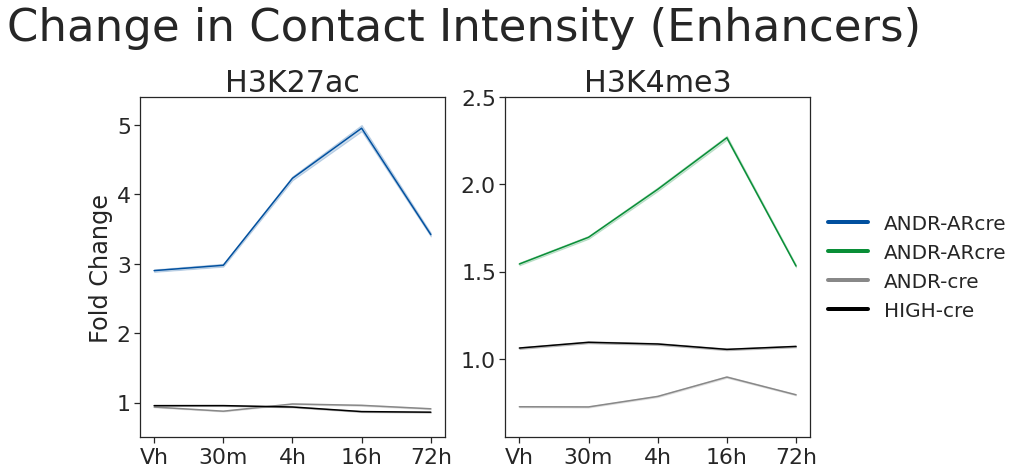

In [7]:

fig = plt.figure(figsize=[12,7])
gs = gridspec.GridSpec(nrows=1, ncols=2, top=0.8)

fig.add_subplot(gs[0])
tmp1 = pd.DataFrame(np.array(FC1_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp1 = tmp1.stack().reset_index()
sns.lineplot(data=tmp1, x='level_1',y=0, color='#01509f')
tmp2 = pd.DataFrame(np.array(FC2_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp2 = tmp2.stack().reset_index()
sns.lineplot(data=tmp2, x='level_1',y=0, color='#888888')
tmp3 = pd.DataFrame(np.array(FC3_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp3 = tmp3.stack().reset_index()
sns.lineplot(data=tmp3, x='level_1',y=0, color='#000000')


plt.ylim(0.5, 5.4)


plt.title(f"H3K27ac", fontsize=30)


plt.ylabel("Fold Change")

#plt.plot(np.linspace(-1,5, 5), [1]*5, lw=2, ls='--', color='#888888')
#plt.xlim(-0.5,4.5)
plt.xlabel('')

fig.add_subplot(gs[1])
tmp1 = pd.DataFrame(np.array(FC1_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp1 = tmp1.stack().reset_index()
sns.lineplot(data=tmp1, x='level_1',y=0, color='#098e37')
tmp2 = pd.DataFrame(np.array(FC2_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp2 = tmp2.stack().reset_index()
sns.lineplot(data=tmp2, x='level_1',y=0, color='#888888')
tmp3 = pd.DataFrame(np.array(FC3_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp3 = tmp3.stack().reset_index()
sns.lineplot(data=tmp3, x='level_1',y=0, color='#000000')




plt.ylim(0.55, 2.5)


plt.title(f"H3K4me3", fontsize=30)



fig.suptitle('Change in Contact Intensity (Enhancers)', fontsize=45)


handles = [Line2D([0], [0], color="#01509f", lw=4),Line2D([0], [0], color="#098e37", lw=4), Line2D([0], [0], color='#888888', lw=4),Line2D([0], [0], color='#000000', lw=4)]
plt.legend(handles,  [f"ANDR-ARcre",f"ANDR-ARcre", 'ANDR-cre', f"HIGH-cre"],loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon=False, fontsize=20)


#plt.plot(np.linspace(-1,5, 5), [1]*5, lw=2, ls='--', color='#888888')
#plt.xlim(-0.5,4.5)

plt.ylabel('')
plt.xlabel('')

#fig.savefig('../plots/contactChangeEnhancer.pdf', bbox_inches ="tight",  pad_inches = 1 )

# THE PROMOTER VIEW

In [45]:

s = 'H3K27ac'

geneset = list([n for n, nc in MAPcl.items() if nc == 'ANDR'])
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:

        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c1 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'Mid-high'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c2 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])



geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])




BOOT = 1000
FC1_H3K27ac = np.zeros((BOOT, 5))
t1_H3K27ac = np.zeros((BOOT, 5))
FC2_H3K27ac = np.zeros((BOOT, 5))
t2_H3K27ac = np.zeros((BOOT, 5))
FC3_H3K27ac = np.zeros((BOOT, 5))
t3_H3K27ac = np.zeros((BOOT, 5))
#for j, s in enumerate(['H3K27ac', 'H3K4me3']):
####################################
np.random.seed(7)
for i in range(BOOT):
    geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
    I = {
        n:list(nx.bfs_layers(H, n))[1]
        for n in geneset
        if n in H
        if len(list(nx.bfs_layers(H, n))) > 1
    }
    pal = ['#5F9BD3', '#FBB550']

    A = []
    for p,es in I.items():
        for e in es:
            if MAPcl[e] == 'cre':
                d = H.get_edge_data(p, e)
                l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

                A += [l]

    tmp = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

    FC1_H3K27ac[i,:] = c1.mean(0) / tmp.mean(0) 
    t_, p_ = ttest_ind(c1, tmp)
    t1_H3K27ac[i,:] = t_
    FC2_H3K27ac[i,:] = c2.mean(0) / tmp.mean(0)
    t_, p_ = ttest_ind(c2, tmp)
    t2_H3K27ac[i,:] = t_
    FC3_H3K27ac[i,:] = c3.mean(0) / tmp.mean(0)
    t_, p_ = ttest_ind(c3, tmp)
    t3_H3K27ac[i,:] = t_        
            
            
   

In [46]:

s = 'H3K4me3'

geneset = list([n for n, nc in MAPcl.items() if nc == 'ANDR'])
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:

        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c1 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'Mid-high'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c2 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])



geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])




BOOT = 1000
FC1_H3K4me3 = np.zeros((BOOT, 5))
t1_H3K4me3 = np.zeros((BOOT, 5))
FC2_H3K4me3 = np.zeros((BOOT, 5))
t2_H3K4me3 = np.zeros((BOOT, 5))
FC3_H3K4me3 = np.zeros((BOOT, 5))
t3_H3K4me3 = np.zeros((BOOT, 5))
#for j, s in enumerate(['H3K27ac', 'H3K4me3']):
####################################
np.random.seed(7)
for i in range(BOOT):
    geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
    I = {
        n:list(nx.bfs_layers(H, n))[1]
        for n in geneset
        if n in H
        if len(list(nx.bfs_layers(H, n))) > 1
    }
    pal = ['#5F9BD3', '#FBB550']

    A = []
    for p,es in I.items():
        for e in es:
            if MAPcl[e] == 'cre':
                d = H.get_edge_data(p, e)
                l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

                A += [l]

    tmp = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

    FC1_H3K4me3[i,:] = c1.mean(0) / tmp.mean(0) 
    t_, p_ = ttest_ind(c1, tmp)
    t1_H3K4me3[i,:] = t_
    FC2_H3K4me3[i,:] = c2.mean(0) / tmp.mean(0)
    t_, p_ = ttest_ind(c2, tmp)
    t2_H3K4me3[i,:] = t_
    FC3_H3K4me3[i,:] = c3.mean(0) / tmp.mean(0)
    t_, p_ = ttest_ind(c3, tmp)
    t3_H3K4me3[i,:] = t_
      
            
            
   

In [47]:
print(np.quantile(t1_H3K27ac[:,0], 0.95), np.quantile(t2_H3K27ac[:,0], 0.95), np.quantile(t3_H3K27ac[:,0], 0.95))

print(np.quantile(t1_H3K27ac[:,1], 0.95), np.quantile(t2_H3K27ac[:,1], 0.95), np.quantile(t3_H3K27ac[:,1], 0.95))

print(np.quantile(t1_H3K27ac[:,2], 0.95), np.quantile(t2_H3K27ac[:,2], 0.95), np.quantile(t3_H3K27ac[:,2], 0.95))

print(np.quantile(t1_H3K27ac[:,3], 0.95), np.quantile(t2_H3K27ac[:,3], 0.95), np.quantile(t3_H3K27ac[:,3], 0.95))

print(np.quantile(t1_H3K27ac[:,4], 0.95), np.quantile(t2_H3K27ac[:,4], 0.95), np.quantile(t3_H3K27ac[:,4], 0.95))

2.7531529343248664 -0.31448775750688207 2.4881757151793265
2.518201111026926 0.29175706605510554 2.6463566669906915
3.4271183702497274 0.11516944367010822 2.4278528061309013
3.512093534181497 -0.37450765847313616 1.938877484203708
3.0054713359057263 -0.1920807788499798 2.095455674873733


In [49]:
print(np.quantile(t1_H3K4me3[:,0], 0.95), np.quantile(t2_H3K4me3[:,0], 0.95), np.quantile(t3_H3K4me3[:,0], 0.95))

print(np.quantile(t1_H3K4me3[:,1], 0.95), np.quantile(t2_H3K4me3[:,1], 0.95), np.quantile(t3_H3K4me3[:,1], 0.95))

print(np.quantile(t1_H3K4me3[:,2], 0.95), np.quantile(t2_H3K4me3[:,2], 0.95), np.quantile(t3_H3K4me3[:,2], 0.95))

print(np.quantile(t1_H3K4me3[:,3], 0.95), np.quantile(t2_H3K4me3[:,3], 0.95), np.quantile(t3_H3K4me3[:,3], 0.95))

print(np.quantile(t1_H3K4me3[:,4], 0.95), np.quantile(t2_H3K4me3[:,4], 0.95), np.quantile(t3_H3K4me3[:,4], 0.95))

0.8497424292728695 1.6998094652189686 4.308780138775855
1.2675911480380373 1.6668252413779259 4.104085143785512
2.227866796958987 1.9357382019852358 4.424402486041756
3.04488343702769 1.5694140635542404 3.985900257145831
1.164053088845369 1.6894567288658364 4.3911824289217245


In [52]:
from scipy.stats import mannwhitneyu, ttest_rel

ttest_rel(FC1_H3K27ac[:,3], FC1_H3K27ac[:,0]),  ttest_rel(FC1_H3K4me3[:,3], FC1_H3K4me3[:,0])

(TtestResult(statistic=92.16640436790169, pvalue=0.0, df=999),
 TtestResult(statistic=219.0291249460777, pvalue=0.0, df=999))

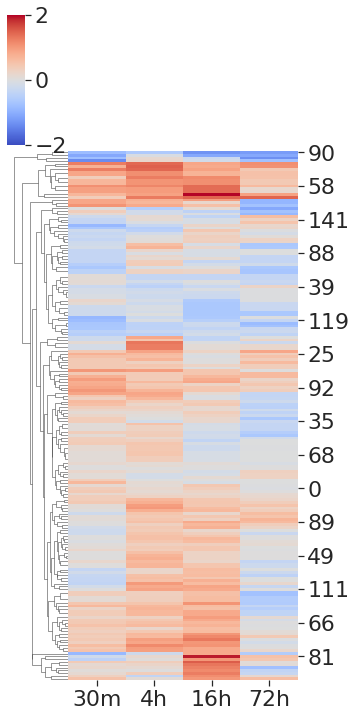

In [76]:
sns.clustermap(np.log2((c1.T+1) / (1+c1['Vh'])).T[['30m', '4h', '16h', '72h']], col_cluster=False, cmap='coolwarm', vmax=2, vmin=-2, figsize=[5,10])

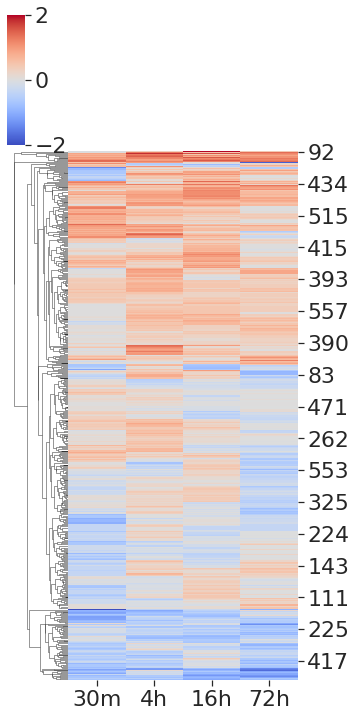

In [77]:
sns.clustermap(np.log2((c2.T+1) / (1+c2['Vh'])).T[['30m', '4h', '16h', '72h']], col_cluster=False, cmap='coolwarm', vmax=2, vmin=-2,figsize=[5,10])

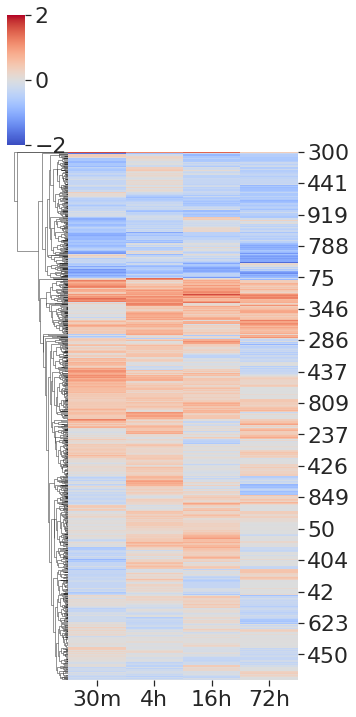

In [79]:
sns.clustermap(np.log2((c3.T+1) / (1+c3['Vh'])).T[['30m', '4h', '16h', '72h']], col_cluster=False, cmap='coolwarm', vmax=2, vmin=-2,figsize=[5,10])

Text(0.5, 1.0, 'HIGH-cre')

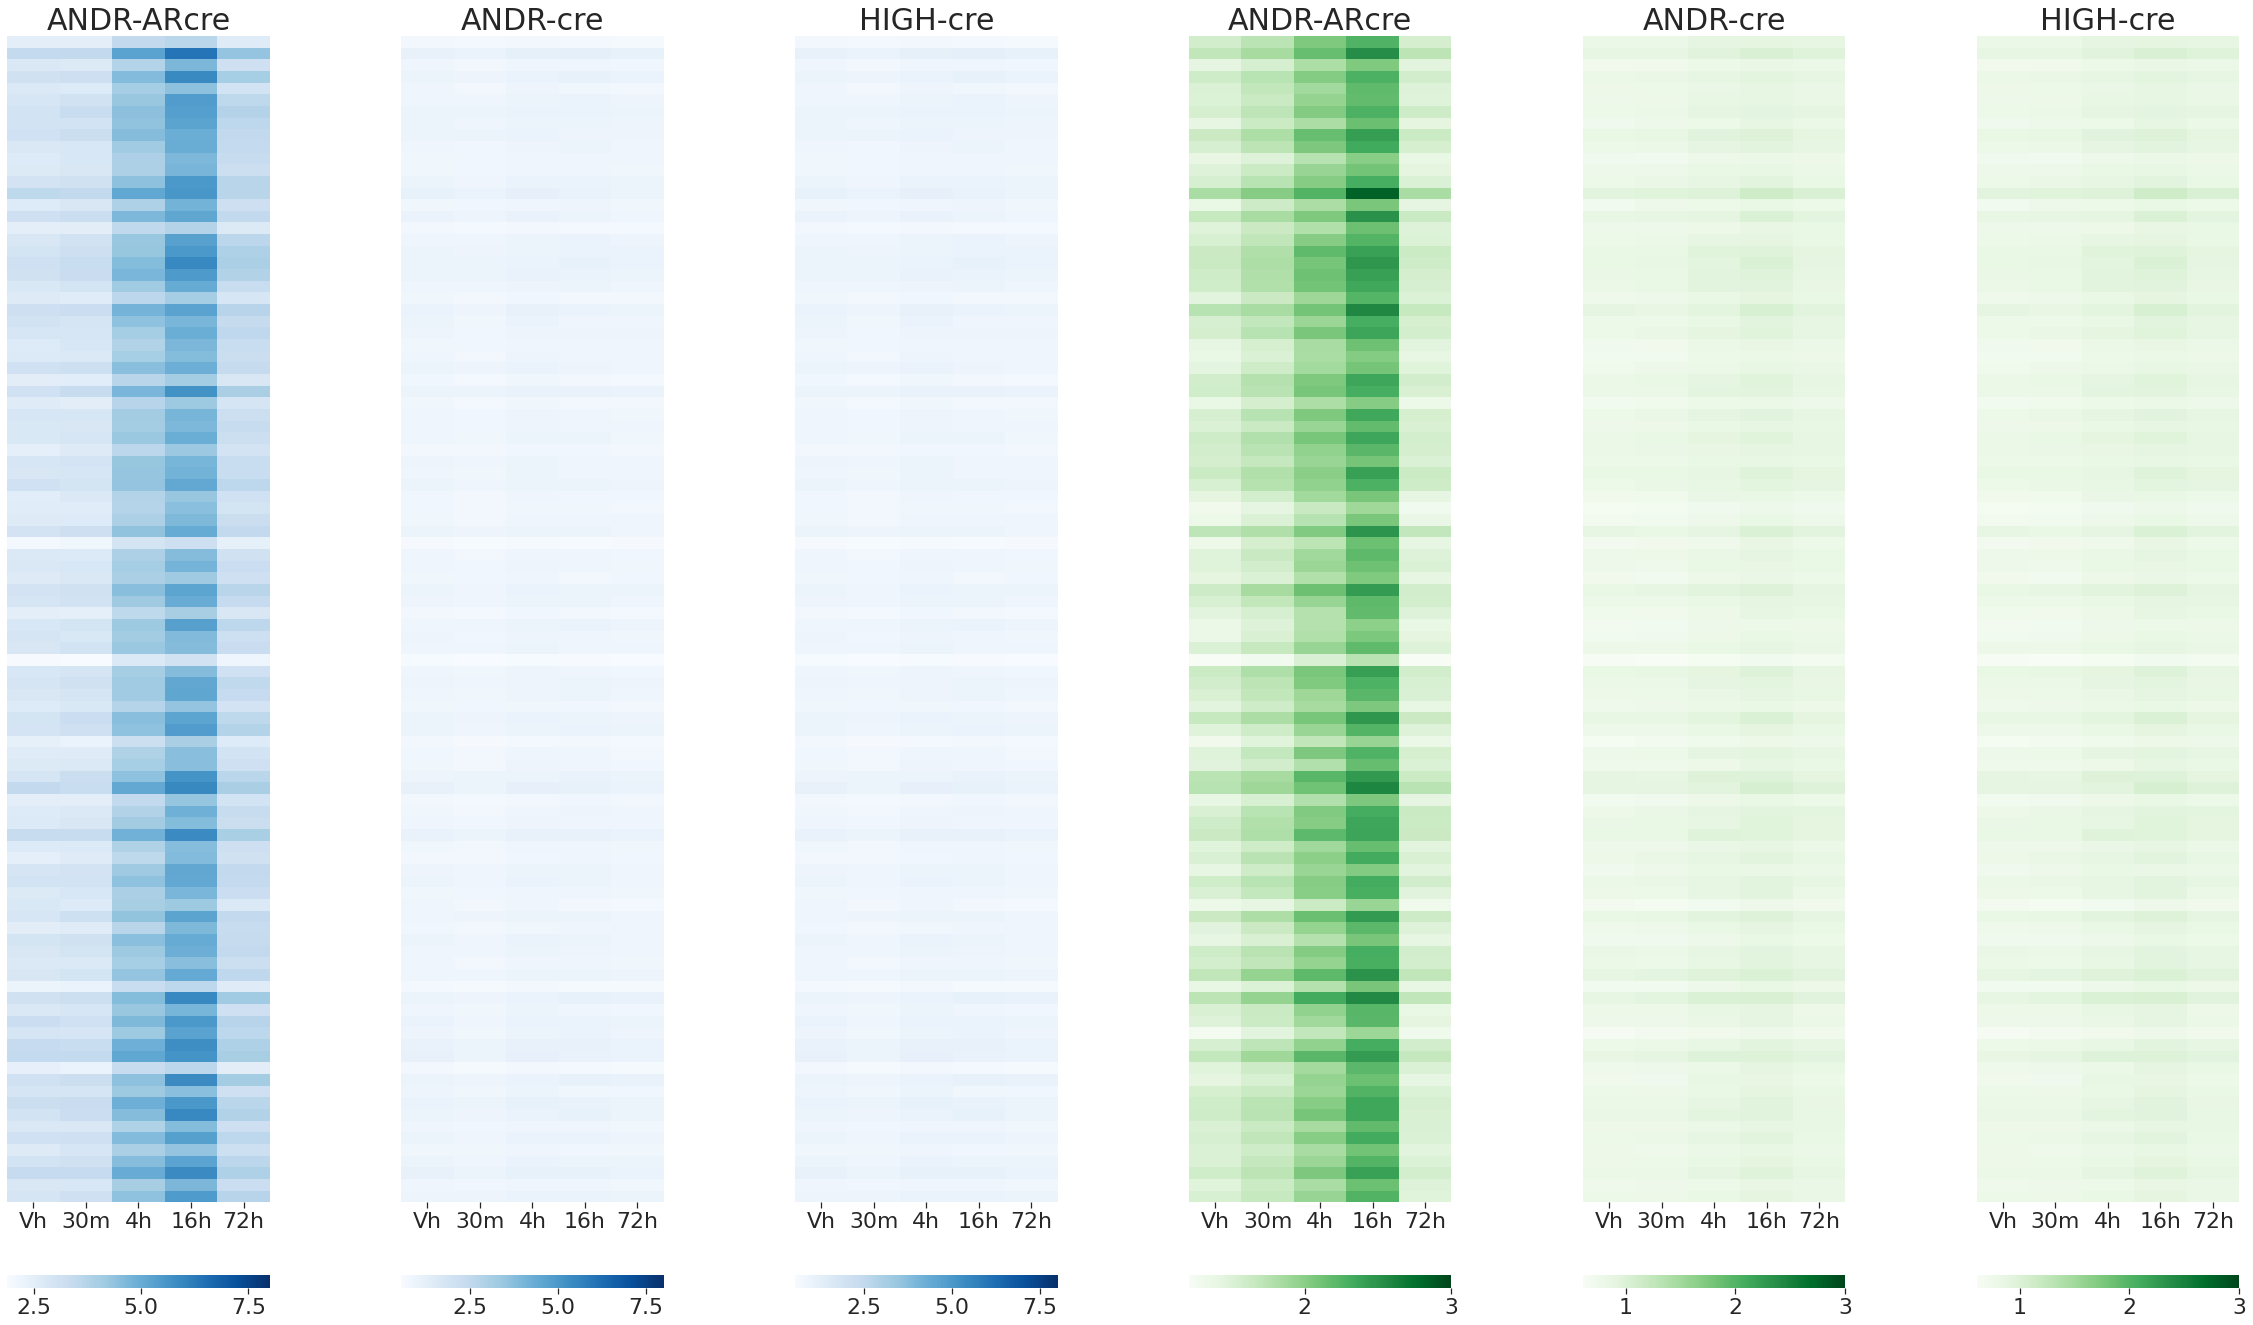

In [105]:

fig = plt.figure(figsize=[40,30])
gs = gridspec.GridSpec(nrows=1, ncols=6, top=0.8, wspace=0.5)

fig.add_subplot(gs[0])
sns.heatmap(FC1_H3K27ac, vmax=8, cmap='Blues', cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.05))
plt.yticks([])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],["Vh", "30m","4h", "16h", "72h"] )
plt.title('ANDR-ARcre', fontsize=30)

fig.add_subplot(gs[1])
sns.heatmap(FC2_H3K27ac, vmax=8, cmap='Blues', cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.05))
plt.yticks([])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],["Vh", "30m","4h", "16h", "72h"] )
plt.title('ANDR-cre', fontsize=30)

fig.add_subplot(gs[2])
sns.heatmap(FC2_H3K27ac, vmax=8, cmap='Blues', cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.05))
plt.yticks([])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],["Vh", "30m","4h", "16h", "72h"] )
plt.title('HIGH-cre', fontsize=30)




fig.add_subplot(gs[3])
sns.heatmap(FC1_H3K4me3, vmax=3, cmap='Greens', cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.05))
plt.yticks([])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],["Vh", "30m","4h", "16h", "72h"] )
plt.title('ANDR-ARcre', fontsize=30)

fig.add_subplot(gs[4])
sns.heatmap(FC2_H3K4me3, vmax=3, cmap='Greens', cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.05))
plt.yticks([])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],["Vh", "30m","4h", "16h", "72h"] )
plt.title('ANDR-cre', fontsize=30)

fig.add_subplot(gs[5])
sns.heatmap(FC2_H3K4me3, vmax=3, cmap='Greens', cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.05))
plt.yticks([])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],["Vh", "30m","4h", "16h", "72h"] )
plt.title('HIGH-cre', fontsize=30)

In [85]:

s = 'H3K27ac'

geneset = list([n for n, nc in MAPcl.items() if nc == 'ANDR'])
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:

        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c1 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'Mid-high'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c2 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])



geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])




BOOT = 100
FC1_H3K27ac = np.zeros((BOOT, 5))
FC2_H3K27ac = np.zeros((BOOT, 5))
FC3_H3K27ac = np.zeros((BOOT, 5))
#for j, s in enumerate(['H3K27ac', 'H3K4me3']):
####################################
np.random.seed(7)
for i in range(BOOT):
    geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
    I = {
        n:list(nx.bfs_layers(H, n))[1]
        for n in geneset
        if n in H
        if len(list(nx.bfs_layers(H, n))) > 1
    }
    pal = ['#5F9BD3', '#FBB550']

    A = []
    for p,es in I.items():
        for e in es:
            if MAPcl[e] == 'cre':
                d = H.get_edge_data(p, e)
                l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

                A += [l]

    tmp = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

    FC1_H3K27ac[i,:] = c1.mean(0) / tmp.mean(0) 
    FC2_H3K27ac[i,:] = c2.mean(0) / tmp.mean(0)
    FC3_H3K27ac[i,:] = c3.mean(0) / tmp.mean(0)        
            
            
   

In [81]:

s = 'H3K4me3'

geneset = list([n for n, nc in MAPcl.items() if nc == 'ANDR'])
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:

        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c1 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'Mid-high'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c2 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])



geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])




BOOT = 100
FC1_H3K4me3 = np.zeros((BOOT, 5))
FC2_H3K4me3 = np.zeros((BOOT, 5))
FC3_H3K4me3 = np.zeros((BOOT, 5))
#for j, s in enumerate(['H3K27ac', 'H3K4me3']):
####################################
np.random.seed(7)
for i in range(BOOT):
    geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
    I = {
        n:list(nx.bfs_layers(H, n))[1]
        for n in geneset
        if n in H
        if len(list(nx.bfs_layers(H, n))) > 1
    }
    pal = ['#5F9BD3', '#FBB550']

    A = []
    for p,es in I.items():
        for e in es:
            if MAPcl[e] == 'cre':
                d = H.get_edge_data(p, e)
                l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

                A += [l]

    tmp = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

    FC1_H3K4me3[i,:] = c1.mean(0) / tmp.mean(0) 
    FC2_H3K4me3[i,:] = c2.mean(0) / tmp.mean(0)
    FC3_H3K4me3[i,:] = c3.mean(0) / tmp.mean(0)        
            
            
   

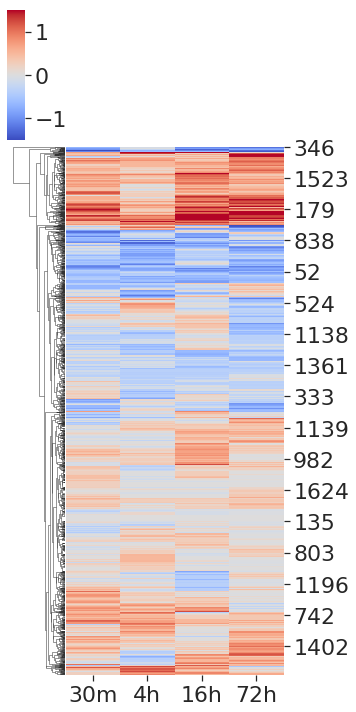

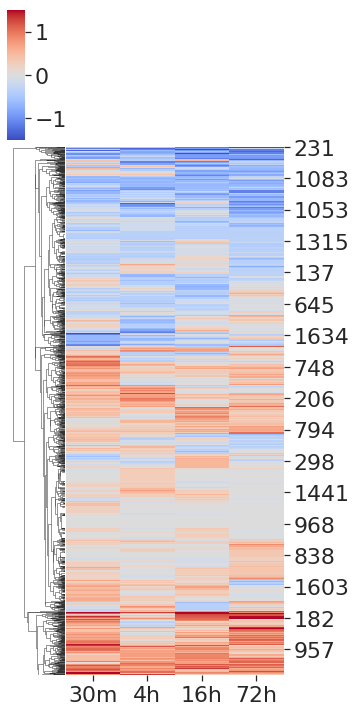

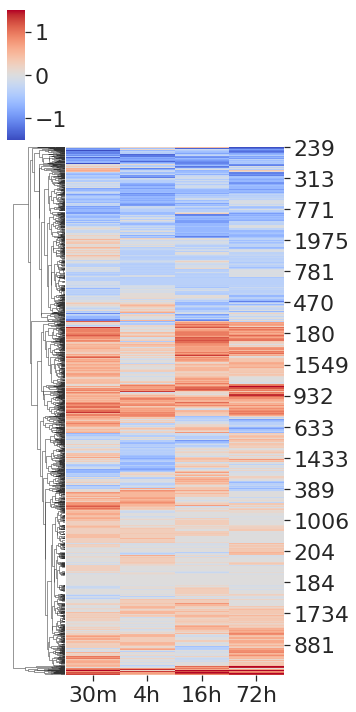

In [86]:
sns.clustermap(np.log2((c1.T+1) / (1+c1['Vh'])).T[['30m', '4h', '16h', '72h']], col_cluster=False, cmap='coolwarm', vmax=1.5, vmin=-1.5, figsize=[5,10])
sns.clustermap(np.log2((c2.T+1) / (1+c2['Vh'])).T[['30m', '4h', '16h', '72h']], col_cluster=False, cmap='coolwarm', vmax=1.5, vmin=-1.5,figsize=[5,10])
sns.clustermap(np.log2((c3.T+1) / (1+c3['Vh'])).T[['30m', '4h', '16h', '72h']], col_cluster=False, cmap='coolwarm', vmax=1.5, vmin=-1.5,figsize=[5,10])

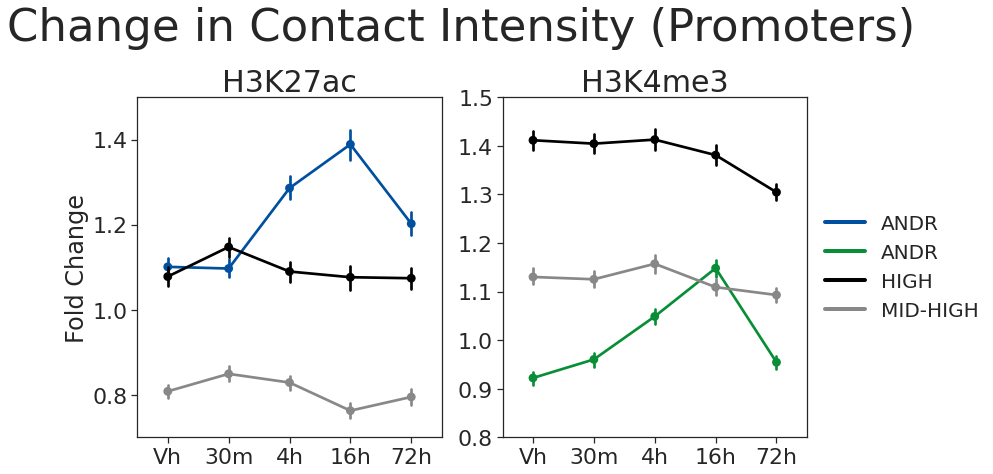

In [15]:

fig = plt.figure(figsize=[12,7])
gs = gridspec.GridSpec(nrows=1, ncols=2, top=0.8)

fig.add_subplot(gs[0])
tmp1 = pd.DataFrame(np.array(FC1_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp1 = tmp1.stack().reset_index()
sns.pointplot(data=tmp1, x='level_1',y=0, color='#01509f')
tmp2 = pd.DataFrame(np.array(FC2_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp2 = tmp2.stack().reset_index()
sns.pointplot(data=tmp2, x='level_1',y=0, color='#888888')
tmp3 = pd.DataFrame(np.array(FC3_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp3 = tmp3.stack().reset_index()
sns.pointplot(data=tmp3, x='level_1',y=0, color='#000000')


plt.ylim(0.7, 1.5)


plt.title(f"H3K27ac", fontsize=30)


plt.ylabel("Fold Change")

#plt.plot(np.linspace(-1,5, 5), [1]*5, lw=2, ls='--', color='#888888')
plt.xlim(-0.5,4.5)
plt.xlabel('')

fig.add_subplot(gs[1])
tmp1 = pd.DataFrame(np.array(FC1_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp1 = tmp1.stack().reset_index()
sns.pointplot(data=tmp1, x='level_1',y=0, color='#098e37')
tmp2 = pd.DataFrame(np.array(FC2_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp2 = tmp2.stack().reset_index()
sns.pointplot(data=tmp2, x='level_1',y=0, color='#888888')
tmp3 = pd.DataFrame(np.array(FC3_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp3 = tmp3.stack().reset_index()
sns.pointplot(data=tmp3, x='level_1',y=0, color='#000000')


 


plt.ylim(0.8, 1.5)


plt.title(f"H3K4me3", fontsize=30)



fig.suptitle('Change in Contact Intensity (Promoters)', fontsize=45)


handles = [Line2D([0], [0], color="#01509f", lw=4),Line2D([0], [0], color="#098e37", lw=4),Line2D([0], [0], color='#000000', lw=4),Line2D([0], [0], color='#888888', lw=4)]
plt.legend(handles,  [f"ANDR",f"ANDR", 'HIGH', f"MID-HIGH"],loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon=False, fontsize=20)


#plt.plot(np.linspace(-1,5, 5), [1]*5, lw=2, ls='--', color='#888888')
plt.xlim(-0.5,4.5)

plt.ylabel('')
plt.xlabel('')




fig.savefig('../plots/contactChangePromoter.pdf', bbox_inches ="tight",  pad_inches = 1 )

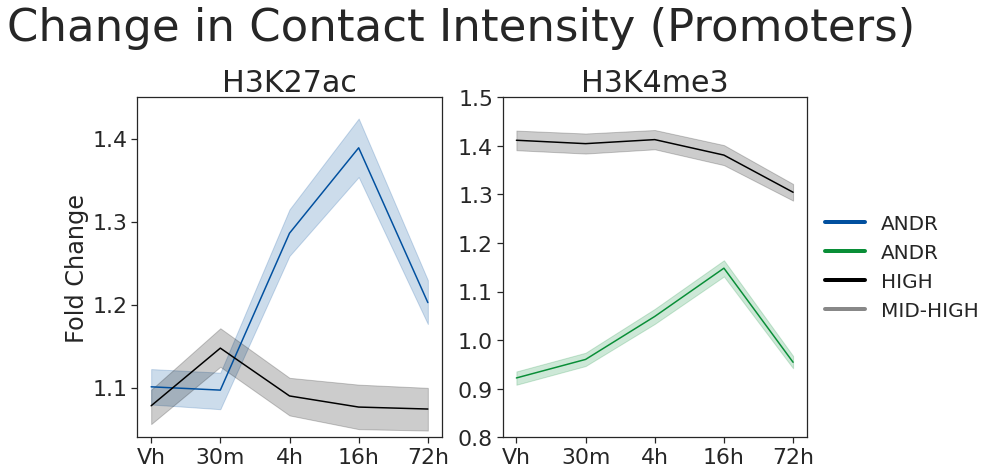

In [22]:

fig = plt.figure(figsize=[12,7])
gs = gridspec.GridSpec(nrows=1, ncols=2, top=0.8)

fig.add_subplot(gs[0])
tmp1 = pd.DataFrame(np.array(FC1_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp1 = tmp1.stack().reset_index()
sns.lineplot(data=tmp1, x='level_1',y=0, color='#01509f')
tmp2 = pd.DataFrame(np.array(FC2_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp2 = tmp2.stack().reset_index()
#sns.lineplot(data=tmp2, x='level_1',y=0, color='#888888')
tmp3 = pd.DataFrame(np.array(FC3_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp3 = tmp3.stack().reset_index()
sns.lineplot(data=tmp3, x='level_1',y=0, color='#000000')


plt.ylim(1.04, 1.45)


plt.title(f"H3K27ac", fontsize=30)


plt.ylabel("Fold Change")

#plt.plot(np.linspace(-1,5, 5), [1]*5, lw=2, ls='--', color='#888888')
#plt.xlim(-0.5,4.5)
plt.xlabel('')

fig.add_subplot(gs[1])
tmp1 = pd.DataFrame(np.array(FC1_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp1 = tmp1.stack().reset_index()
sns.lineplot(data=tmp1, x='level_1',y=0, color='#098e37')
tmp2 = pd.DataFrame(np.array(FC2_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp2 = tmp2.stack().reset_index()
#sns.lineplot(data=tmp2, x='level_1',y=0, color='#888888')
tmp3 = pd.DataFrame(np.array(FC3_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp3 = tmp3.stack().reset_index()
sns.lineplot(data=tmp3, x='level_1',y=0, color='#000000')




plt.ylim(0.8, 1.5)


plt.title(f"H3K4me3", fontsize=30)



fig.suptitle('Change in Contact Intensity (Promoters)', fontsize=45)


handles = [Line2D([0], [0], color="#01509f", lw=4),Line2D([0], [0], color="#098e37", lw=4),Line2D([0], [0], color='#000000', lw=4),Line2D([0], [0], color='#888888', lw=4)]
plt.legend(handles,  [f"ANDR",f"ANDR", 'HIGH', f"MID-HIGH"],loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon=False, fontsize=20)


#plt.plot(np.linspace(-1,5, 5), [1]*5, lw=2, ls='--', color='#888888')
#plt.xlim(-0.5,4.5)

plt.ylabel('')
plt.xlabel('')




fig.savefig('../plots/contactChangePromoter.pdf', bbox_inches ="tight",  pad_inches = 1 )

Text(0.5, 1.0, 'MID-HIGH')

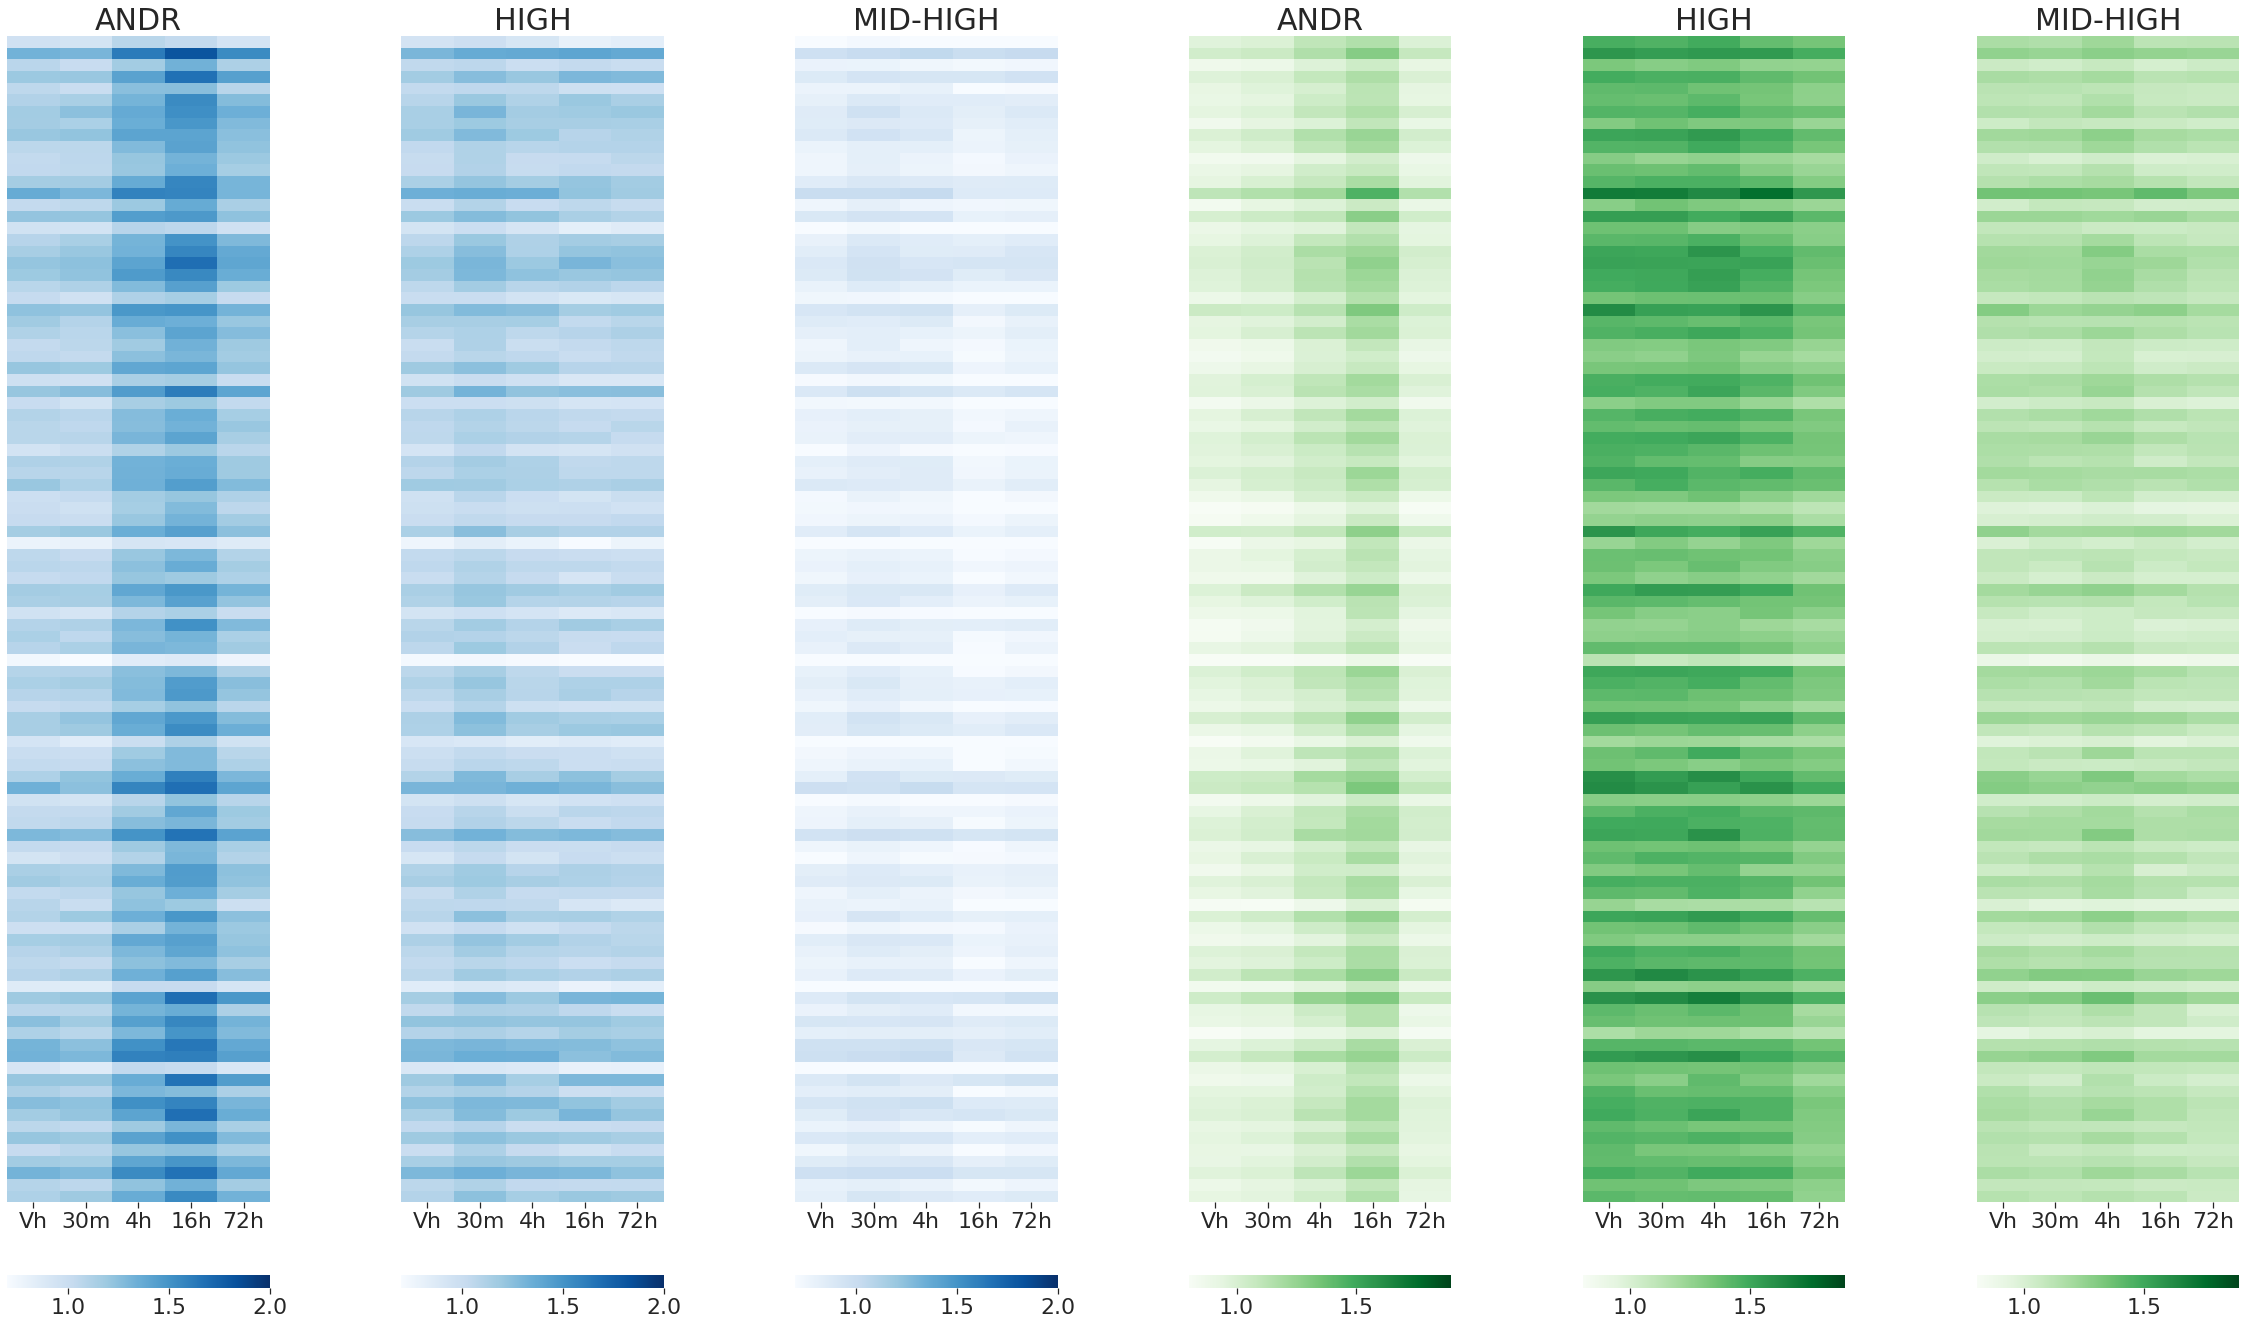

In [120]:

fig = plt.figure(figsize=[40,30])
gs = gridspec.GridSpec(nrows=1, ncols=6, top=0.8, wspace=0.5)

fig.add_subplot(gs[0])
sns.heatmap(FC1_H3K27ac, vmax=2,vmin=0.7, cmap='Blues', cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.05))
plt.yticks([])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],["Vh", "30m","4h", "16h", "72h"] )
plt.title('ANDR', fontsize=30)

fig.add_subplot(gs[1])
sns.heatmap(FC3_H3K27ac, vmax=2,vmin=0.7, cmap='Blues', cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.05))
plt.yticks([])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],["Vh", "30m","4h", "16h", "72h"] )
plt.title('HIGH', fontsize=30)

fig.add_subplot(gs[2])
sns.heatmap(FC2_H3K27ac, vmax=2,vmin=0.7, cmap='Blues', cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.05))
plt.yticks([])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],["Vh", "30m","4h", "16h", "72h"] )
plt.title('MID-HIGH', fontsize=30)




fig.add_subplot(gs[3])
sns.heatmap(FC1_H3K4me3, vmax=1.9,vmin=0.8, cmap='Greens', cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.05))
plt.yticks([])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],["Vh", "30m","4h", "16h", "72h"] )
plt.title('ANDR', fontsize=30)

fig.add_subplot(gs[4])
sns.heatmap(FC3_H3K4me3, vmax=1.9,vmin=0.8, cmap='Greens', cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.05))
plt.yticks([])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],["Vh", "30m","4h", "16h", "72h"] )
plt.title('HIGH', fontsize=30)

fig.add_subplot(gs[5])
sns.heatmap(FC2_H3K4me3, vmax=1.9,vmin=0.8, cmap='Greens', cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.05))
plt.yticks([])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],["Vh", "30m","4h", "16h", "72h"] )
plt.title('MID-HIGH', fontsize=30)

Text(0.5, 1.0, 'MID-HIGH')

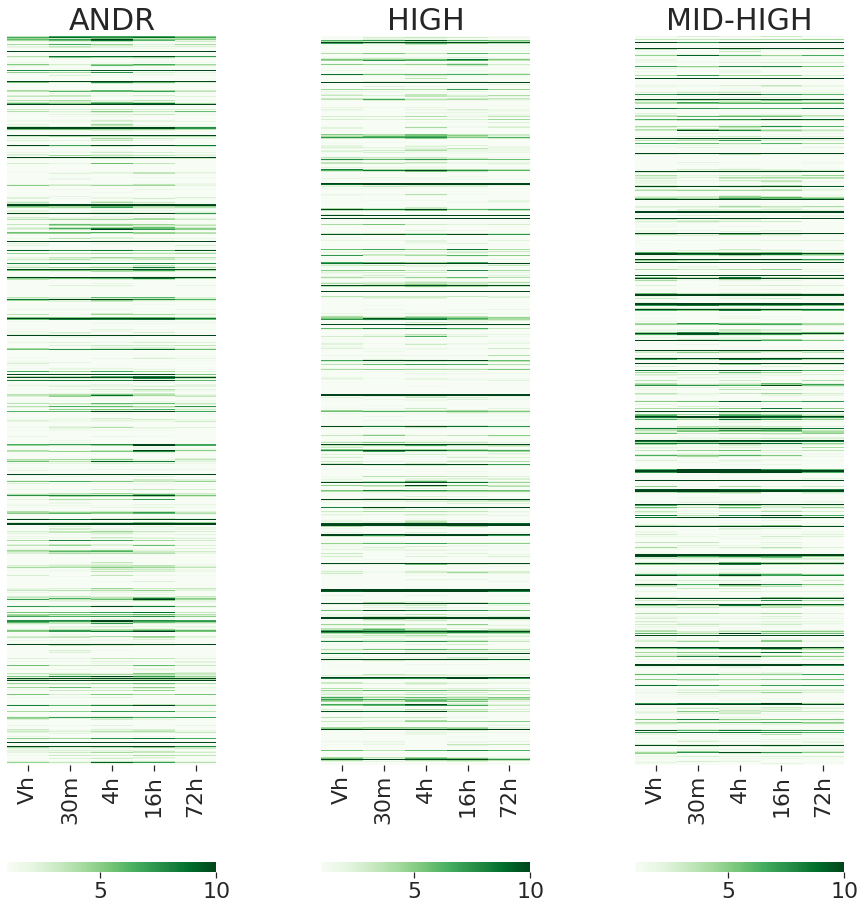

In [152]:
s = 'H3K4me3'

geneset = list([n for n, nc in MAPcl.items() if nc == 'ANDR'])
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:

        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c1 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'Mid-high'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c2 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])



geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])





fig = plt.figure(figsize=[15,20])

gs = gridspec.GridSpec(nrows=1, ncols=3, top=0.8, wspace=0.5)

fig.add_subplot(gs[0])
i = np.argsort(c1.mean(1))[::-1]
sns.heatmap(c1, cmap='Greens', vmax=10, vmin=1,cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.1))
plt.yticks([])
plt.title('ANDR', fontsize=30)

fig.add_subplot(gs[1])
i = np.argsort(c2.mean(1))[::-1]
sns.heatmap(c2, cmap='Greens', vmax=10, vmin=1,cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.1))
plt.yticks([])
plt.title('HIGH', fontsize=30)

fig.add_subplot(gs[2])
i = np.argsort(c3.mean(1))[::-1]
sns.heatmap(c3, cmap='Greens', vmax=10, vmin=1,cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.1))
plt.yticks([])
plt.title('MID-HIGH', fontsize=30)

Text(0.5, 1.0, 'MID-HIGH')

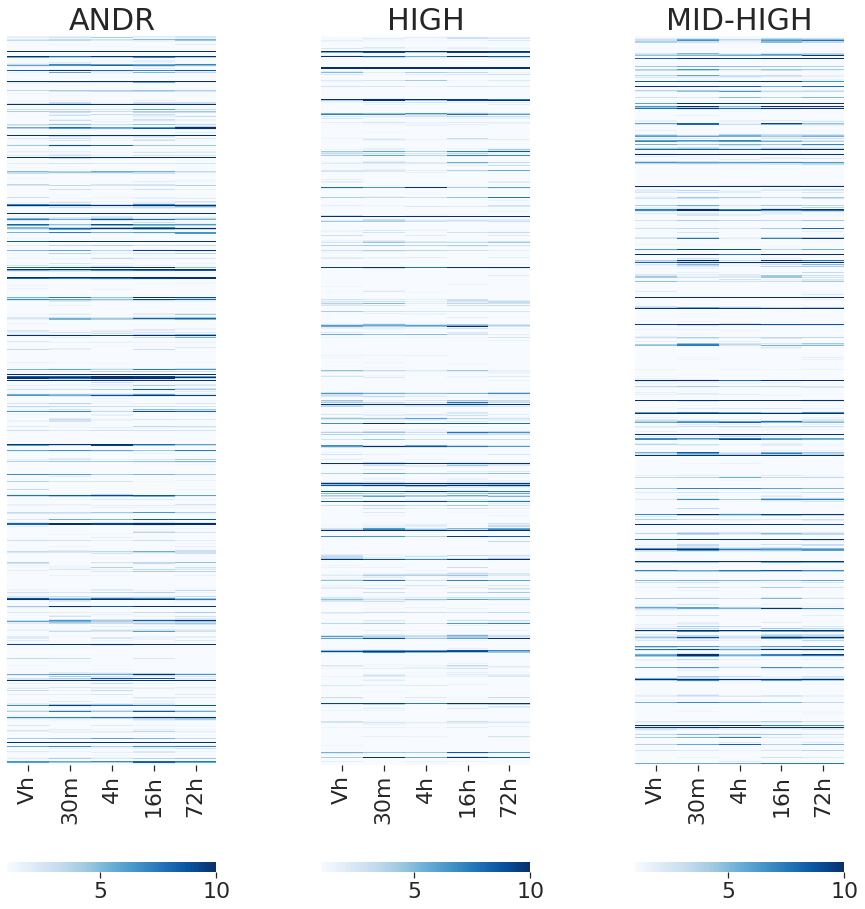

In [151]:
s = 'H3K27ac'

geneset = list([n for n, nc in MAPcl.items() if nc == 'ANDR'])
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:

        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c1 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'Mid-high'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c2 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])



geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])





fig = plt.figure(figsize=[15,20])

gs = gridspec.GridSpec(nrows=1, ncols=3, top=0.8, wspace=0.5)

fig.add_subplot(gs[0])
i = np.argsort(c1.mean(1))[::-1]
sns.heatmap(c1, cmap='Blues', vmax=10, vmin=1,cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.1))
plt.yticks([])
plt.title('ANDR', fontsize=30)

fig.add_subplot(gs[1])
i = np.argsort(c2.mean(1))[::-1]
sns.heatmap(c2, cmap='Blues', vmax=10, vmin=1,cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.1))
plt.yticks([])
plt.title('HIGH', fontsize=30)

fig.add_subplot(gs[2])
i = np.argsort(c3.mean(1))[::-1]
sns.heatmap(c3, cmap='Blues', vmax=10, vmin=1,cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.1))
plt.yticks([])
plt.title('MID-HIGH', fontsize=30)

In [146]:
c2.mean()

Vh     2.364791
30m    2.388187
4h     2.807546
16h    2.450459
72h    1.891447
dtype: float64

In [147]:
c3.mean()

Vh     2.733982
30m    2.841882
4h     3.481486
16h    2.838095
72h    2.189389
dtype: float64

In [ ]:
plt.plot(R.mean(0))

In [76]:
counts = Counter(BEDPRO["Quartile"])

np.random.seed(7)

a = bt.BedTool.from_dataframe(BEDPRO.loc[BEDPRO['Quartile'] == 'ANDR', ["Chr","Start","End","Gene"]])
Ngenes = len(a)


d = {}
for i, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
    d[h] = dict(bt.BedTool.pair_to_bed(BEDPES_H3K27ac[h],a).to_dataframe(names=range(14)).drop_duplicates().groupby(11).sum()[7])

common = list(set.intersection(*[set(d_) for d_ in d.values()]))

A = np.zeros((len(common), 5))
for i, edge in enumerate(common):
    for j, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
        A[i, j] = d[h][edge]

othrs = BEDPRO[(BEDPRO["Quartile"] == 'High') & (BEDPRO['Chr'].str.find('_') == -1)][["Chr","Start","End","Gene"]]

othr = othrs[othrs["Gene"].isin(pd.Series(othrs["Gene"].unique()).sample(n=Ngenes).tolist())]
b = bt.BedTool.from_dataframe(othr)
d = {}
for i, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
    d[h] = dict(bt.BedTool.pair_to_bed(BEDPES_H3K27ac[h],b).to_dataframe(names=range(14)).drop_duplicates().groupby(11).sum()[7])

common = list(set.intersection(*[set(d_) for d_ in d.values()]))

X = np.zeros((len(common), 5))
for i, edge in enumerate(common):
    for j, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
        X[i, j] = d[h][edge]

BOOT = 5

B_H3K27ac = np.zeros((BOOT,5))
Y_H3K27ac = np.zeros((BOOT,5))
for nBoot in range(BOOT):
    if nBoot %10 == 0:
        print(nBoot, end=' ')
    othrs = BEDPRO[(BEDPRO["Quartile"] == 'High') & (BEDPRO['Chr'].str.find('_') == -1)][["Chr","Start","End","Gene"]]

    othr = othrs[othrs["Gene"].isin(pd.Series(othrs["Gene"].unique()).sample(n=Ngenes).tolist())]
    b = bt.BedTool.from_dataframe(othr)
    d = {}
    for i, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
        d[h] = dict(bt.BedTool.pair_to_bed(BEDPES_H3K27ac[h],b).to_dataframe(names=range(14)).drop_duplicates().groupby(11).sum()[7])

    common = list(set.intersection(*[set(d_) for d_ in d.values()]))

    R = np.zeros((len(common), 5))
    for i, edge in enumerate(common):
        for j, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
            R[i, j] = d[h][edge]


    B_H3K27ac[nBoot,:] = A.mean(0) / R.mean(0)
    
    Y_H3K27ac[nBoot,:] = X.mean(0) / R.mean(0)



0 

In [77]:
counts = Counter(BEDPRO["Quartile"])

np.random.seed(7)

a = bt.BedTool.from_dataframe(BEDPRO.loc[BEDPRO['Quartile'] == 'ANDR', ["Chr","Start","End","Gene"]])
Ngenes = len(a)


d = {}
for i, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
    d[h] = dict(bt.BedTool.pair_to_bed(BEDPES_H3K4me3[h],a).to_dataframe(names=range(14)).drop_duplicates().groupby(11).sum()[7])

common = list(set.intersection(*[set(d_) for d_ in d.values()]))

A = np.zeros((len(common), 5))
for i, edge in enumerate(common):
    for j, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
        A[i, j] = d[h][edge]

othrs = BEDPRO[(BEDPRO["Quartile"] == 'High') & (BEDPRO['Chr'].str.find('_') == -1)][["Chr","Start","End","Gene"]]

othr = othrs[othrs["Gene"].isin(pd.Series(othrs["Gene"].unique()).sample(n=Ngenes).tolist())]
b = bt.BedTool.from_dataframe(othr)
d = {}
for i, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
    d[h] = dict(bt.BedTool.pair_to_bed(BEDPES_H3K4me3[h],b).to_dataframe(names=range(14)).drop_duplicates().groupby(11).sum()[7])

common = list(set.intersection(*[set(d_) for d_ in d.values()]))

X = np.zeros((len(common), 5))
for i, edge in enumerate(common):
    for j, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
        X[i, j] = d[h][edge]

BOOT = 5

B_H3K4me3 = np.zeros((BOOT,5))
Y_H3K4me3 = np.zeros((BOOT,5))
for nBoot in range(BOOT):
    if nBoot %10 == 0:
        print(nBoot, end=' ')
    othrs = BEDPRO[(BEDPRO["Quartile"] == 'High') & (BEDPRO['Chr'].str.find('_') == -1)][["Chr","Start","End","Gene"]]

    othr = othrs[othrs["Gene"].isin(pd.Series(othrs["Gene"].unique()).sample(n=Ngenes).tolist())]
    b = bt.BedTool.from_dataframe(othr)
    d = {}
    for i, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
        d[h] = dict(bt.BedTool.pair_to_bed(BEDPES_H3K4me3[h],b).to_dataframe(names=range(14)).drop_duplicates().groupby(11).sum()[7])

    common = list(set.intersection(*[set(d_) for d_ in d.values()]))

    R = np.zeros((len(common), 5))
    for i, edge in enumerate(common):
        for j, h in  enumerate(["Vh", "30m","4h", "16h", "72h"]):
            R[i, j] = d[h][edge]


    B_H3K4me3[nBoot,:] = A.mean(0) / R.mean(0)
    
    Y_H3K4me3[nBoot,:] = X.mean(0) / R.mean(0)



0 

(-0.5, 4.5)

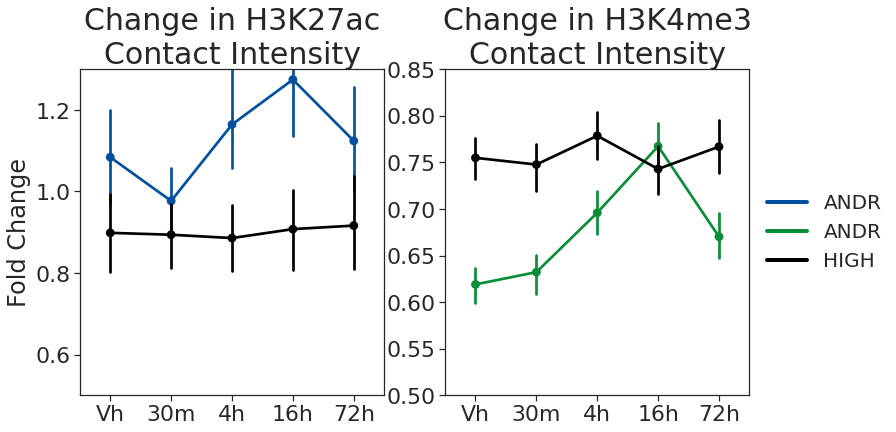

In [78]:

fig = plt.figure(figsize=[12,6])
gs = gridspec.GridSpec(nrows=1,ncols=2)




fig.add_subplot(gs[0])
sns.pointplot(data=B_H3K27ac, color="#01509f")
sns.pointplot(data=Y_H3K27ac, color='#000000')

plt.ylabel("Fold Change")


plt.title(f"Change in H3K27ac\nContact Intensity", fontsize=30)
plt.xticks(range(5),["Vh", "30m","4h", "16h", "72h"])
plt.ylim(0.5, 1.3)

#plt.plot(np.linspace(-1,5, 5), [1]*5, lw=2, ls='--', color='#888888')
plt.xlim(-0.5,4.5)





fig.add_subplot(gs[1])
sns.pointplot(data=B_H3K4me3, color="#098e37")
sns.pointplot(data=Y_H3K4me3, color='#000000')

plt.ylabel('')


handles = [Line2D([0], [0], color="#FBB550", lw=4), Line2D([0], [0], color=color2[-1], lw=4)]


plt.legend(handles,  [f"ANDR", f"HIGH"], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False, fontsize=20)

plt.title(f"Change in H3K4me3\nContact Intensity", fontsize=30)
plt.xticks(range(5),["Vh", "30m","4h", "16h", "72h"])
plt.ylim(0.5, 0.85)


handles = [Line2D([0], [0], color="#01509f", lw=4),Line2D([0], [0], color="#098e37", lw=4), Line2D([0], [0], color='#000000', lw=4)]
plt.legend(handles,  [f"ANDR",f"ANDR",  f"HIGH"],loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon=False, fontsize=20)


#plt.plot(np.linspace(-1,5, 5), [1]*5, lw=2, ls='--', color='#888888')
plt.xlim(-0.5,4.5)


#fig.savefig('plots/H3K4me3contact.pdf',bbox_inches="tight", pad_inches=1)

In [90]:
BEDPRO

,Chr,Start,End,Strand,Gene,Name,Quartile,Vh,30m,4h,16h,72h,Avg
0,chr1,750251,755251,+,FAM87B,chr1:750251-755251,Mid-low,1.464440,1.061064,2.056741,1.769892,1.373466,1.545121
1,chr1,760402,765402,-,LINC00115,chr1:760402-765402,Mid-low,2.477468,1.685943,2.445682,2.311587,1.808378,2.145811
2,chr1,788945,793945,+,LINC01128,chr1:788945-793945,Mid-high,34.648645,35.567092,39.423374,44.561399,31.274971,37.095096
3,chr1,805347,810347,-,FAM41C,chr1:805347-810347,low,0.028126,0.030482,0.000000,0.000000,0.011112,0.013944
4,chr1,863733,868733,+,SAMD11,chr1:863733-868733,Mid-high,48.158725,54.576629,52.497066,71.104095,48.928532,55.053010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22074,chrY,22735162,22740162,+,EIF1AY,chrY:22735162-22740162,Mid-high,36.545939,34.924406,35.255010,40.319896,41.571354,37.723321
22076,chrY,22934698,22939698,+,RPS4Y2,chrY:22934698-22939698,low,0.000000,0.000000,0.025511,0.000000,0.000000,0.005102
22079,chrY,23791501,23796501,-,ELOCP5,chrY:23791501-23796501,low,0.028126,0.000000,0.000000,0.000000,0.000000,0.005625
22080,chrY,23829351,23834351,+,USP9YP3,chrY:23829351-23834351,low,0.000000,0.000000,0.000000,0.025037,0.011112,0.007230
